# Shapley Values

In this notebook we will try to understand how a pre-trained model makes its predictions using the SHAP (SHapley Additive exPlanations) library. The Tree model was trained to predict survival probability of passengers on the titanic. We will analyze the model by generating several plots that combine Shapley values at different resolutions. Your job is to read the [documentation](https://shap.readthedocs.io/en/latest/index.html), and interpret each of the generated plots. 

In [3]:
# Load the necessary libraries

import shap # For SHAP plots
import joblib # For loading the model
import pandas as pd # For data manipulation
shap.initjs() # Initialize JavaScript for SHAP visualizations
import warnings # Mute all errors
warnings.filterwarnings("ignore")

In [4]:
# Load the pre-trained model
# This model is a scikit-learn pipeline that takes raw data and outputs a prediction.
# The model predicts a survival score
# where a higher score means a higher chance of survival.
model = joblib.load('../models/titanic_model.pkl')

# Load the data
# We load the same data the model was trained on to analyze its behavior.
# This dataset contains information about the passengers on the Titanic.
# It does not include the survival outcome, however this target was used during training.
data = pd.read_csv('../data/titanic_data.csv')
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2.0
1,1,0,38.0,1,0,71.2833,0.0
2,3,0,26.0,0,0,7.9250,2.0
3,1,0,35.0,1,0,53.1000,2.0
4,3,1,35.0,0,0,8.0500,2.0


### 2: Preparing the Data and Creating the SHAP Explainer

The SHAP library needs two main things to explain a model's predictions:

- The Model: The prediction logic we want to explain.

- The Data: A set of examples to run through the model for explanation.

We will use the modern shap.Explainer interface, which automatically selects the best explainer type, in this case the fast TreeExplainer behind the scenes.

In [5]:
# We'll use all our data for the explanation, but in practice, a representative
# sample (e.g., 100-1000 rows) is often sufficient and much faster.
X = data

# 1. Create a SHAP explainer object
# We pass the model and the data to the explainer.
# The explainer learns the model's behavior based on the data provided.
explainer = shap.Explainer(model, X)

# 2. Calculate SHAP values
# This computes the SHAP value for each feature for each prediction.
# The output is a special 'Explanation' object that contains the values,
# the original data, feature names, and more.
shap_values = explainer(X)

print("SHAP values have been calculated.")
print(shap_values.shape) # (num_samples, num_features)

SHAP values have been calculated.
(891, 7)


### 3: Global Feature Importance - The "Big Picture"

Global explanations help us understand the model's behavior as a whole, across all predictions. We can answer questions like, "What features are most important to the model overall?" This is a global explanation. This is the simplest way to see which features have the biggest impact on the model's predictions. 

***Bar plot***

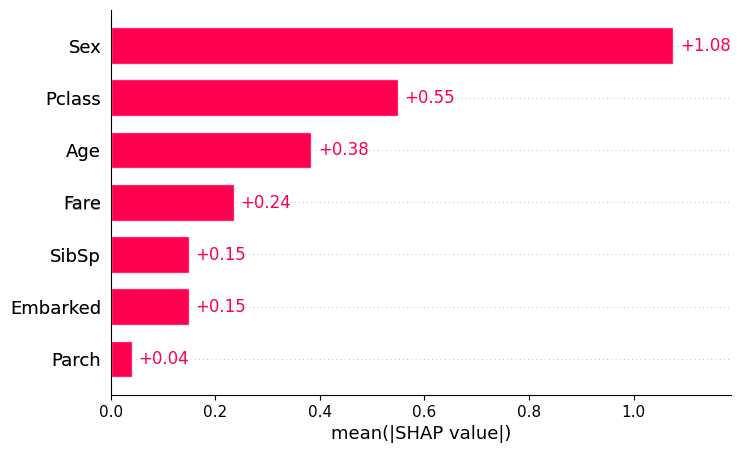

In [8]:
# Generate the Bar Plot
shap.plots.bar(shap_values)

Your interpretation here: Which features are most important and what information can we extract from the plot?

***Beeswarm Plot*** (Summary Plot)

The beeswarm plot is much richer than the bar plot. It shows not only the importance of each feature but also how the value of that feature affects the prediction.

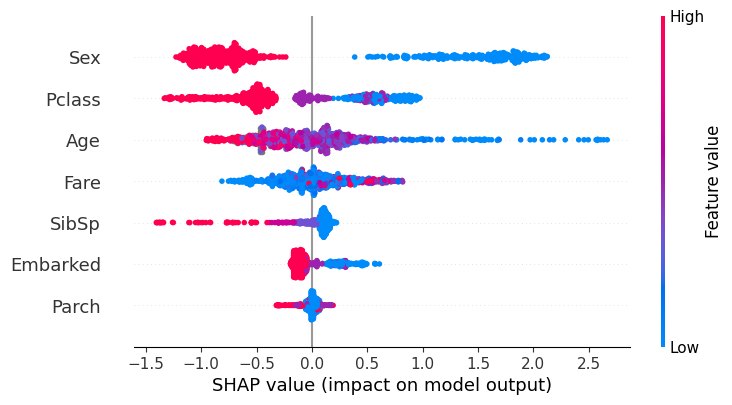

In [9]:
 # Generate the Beeswarm Plot
shap.plots.beeswarm(shap_values)

Your interpretation here: Explain what the horizontal position encodes as well as the color. Generate hypotheses about survival statistics based on certain features. What would be the best combination of features for survival, and what would be the worst?

### 4. Local Explanations - Explaining a Single Prediction

We now zoom in and explain how the model arrived at its prediction for one specific person. This is called a local explanation.

***Waterfall Plot***

The waterfall plot breaks down a single prediction, showing how each feature's contribution moves the prediction from the "base value" to the final score.

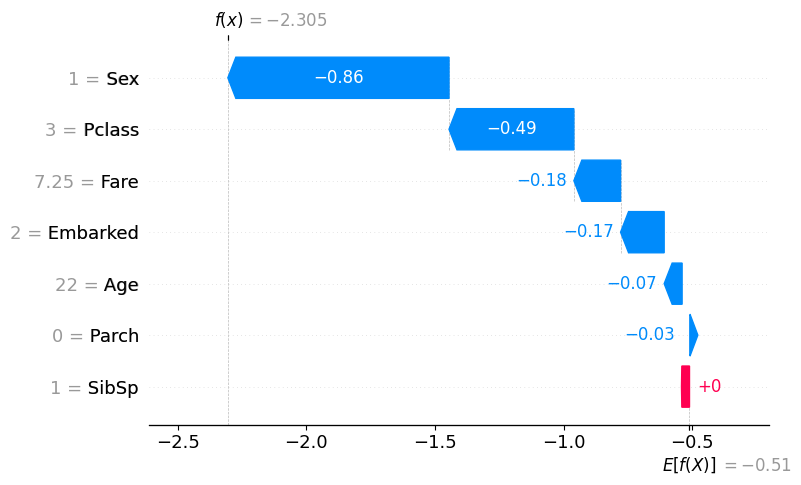

In [10]:
# Let's explain the prediction for the first person in our dataset (at index 0)
shap.plots.waterfall(shap_values[0])

Your interpretation here:

### 5: Feature Interaction Effects

Sometimes, the effect of one feature depends on the value of another. This is something our ICE and PDP plots could not reveal, however, SHAP can help us uncover these relationships.

***Dependence Plot*** (Scatter Plot)

A dependence plot shows how the value of a single feature impacts its SHAP value. We can color it by another feature to discover interactions.

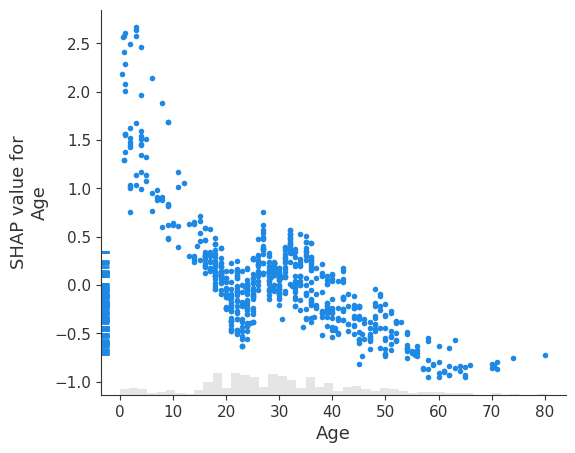

In [13]:
# Let's examine the effect of 'Age' on the model's prediction.
# SHAP will automatically color the dots by the feature that interacts most with 'Age'.
shap.plots.scatter(shap_values[:, "Age"])

Your interpretation here: What do the horizontal axis and colors encode? What is the color bar on the right, and how do we measure feature dependence? In other words, what is the telltale sign of dependence? Generate a working hypothesis about the plot's overall meaning.